In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=3


In [2]:
data = pd.read_csv("allnews.csv")
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 38053


In [3]:
data.head()

,신문사,분류,제목,본문,날짜 및 시간
0,프레시안,경제,뉴라운드 협상 이제부터다 - WTO 국민연대 장원석 집행위원장의 협상 참관기,지난 11월 9일부터 14일까지 카타르 도하에서 열린 세계무역기구(WTO) 각료...,['2001-11-21 09:53:00']
1,프레시안,세계,"미, 이슬람권 대상 방송국 설립 추진 - 본격 선전전 나서",미 정부가 아랍권 여론 장악을 위해 5억달러를 들여 위성방송국 설립을 추진중인 ...,['2001-11-21 09:53:00']
2,프레시안,정치,개혁신당 운동 젊은 의원들이 밀어붙여라 - 이부영 한나라당 부총재 인터뷰,한나라당 이부영 부총재는 19일 프레시안과 인터뷰를 갖고 개혁신당 운동에 대해 ...,['2001-11-21 09:53:00']
3,프레시안,세계,잊혀진 나라 '아프간' <6ㆍ끝> - 누가 이 전쟁을 멈출 것인가,아프간의 기아 참상을 영화로 찍기 위해 방글라데시 유엔 대표인 카말 후세인 박사...,['2001-11-20 10:01:00']
4,프레시안,세계,"미국, 고문 합법화. 비밀재판 추진 - ""미국이외는 야만이라는 미국의 야만적 사고""",“테러범들에 대한 고문을 합법화해야 한다.”\n “테러범들은 비밀리에 항공모함...,['2001-11-20 10:01:00']


In [4]:
data = data[['본문','제목']]
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

,본문,제목
2113,산업은행이 대우증권을 인수하는데 5000억원 정도가 투입될 전망이다.\n\n산업은행...,산업은행 대우증권 인수가격 5천억원선
5950,(광주=연합뉴스) 여운창기자 = 20년 전 5.18 당시 사망자들의 시신과 관을 덮...,<5.18 20주년 화제> 5.18 유품 그 어디에
803,김대중 대통령의 3남 김홍걸씨와 이신범 전 의원 사이의 미국 법원 소송이 점입가...,"""합의 없으면 李씨측 패소 가능성"" - 이신범 대 김홍걸 소송 전말과 향후 전망"
28494,"""오는 2005년까지 전국에 55개 이상의 할인점을 만들어 국내 1위의 소매 유통업...","""2005년까지 국내1위 소매유통업체 부상""...삼성테스코 이승한사장"
20460,(서울=연합뉴스) 추승호 기자 = 코스닥 등록기업인 우리기술이 지하철 역사를거점으로...,"우리기술,지하철 독점 물류사업권 따내"
20544,<이 기사는 1일 오후 6시 이후 사용할 수 있습니다>\n\n(서울=연합뉴스) 김현...,김대통령 일.러 정상과 전화통화
24317,문화일보가 지면을 통해 공개적으로 선거보도준칙을 공표하고 독자들에게 선거개혁을 선도...,문화 ‘선거보도준칙’ 20개항 공표
34552,다우기술(www.daou.co.kr 대표 김종환)은 지난해부터 미국 비넷사의 CMS...,<특집-CMS> 다우기술
27257,"의료기술이 나날이 발전하고 있지만 아직도 수많은 환자들이 백혈병, 소아암, 선천성면...",[발언대] 난치병 치유 제대혈 기증 활성화를
23096,(안양=연합뉴스) 이복한기자 = 경기도 안양시가 청내에 입주한 일부 외부 업체직원들...,"<안양시, 외부직원 용모.옷차림 놓고 고심>"


In [5]:
print('본문 열에서 중복을 배제한 유일한 샘플의 수 :', data['본문'].nunique())
print('제목 열에서 중복을 배제한 유일한 샘플의 수 :', data['제목'].nunique())

본문 열에서 중복을 배제한 유일한 샘플의 수 : 35940
제목 열에서 중복을 배제한 유일한 샘플의 수 : 36039


In [6]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['본문'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35941


In [7]:
print(data.isnull().sum())

본문    1
제목    1
dtype: int64


In [8]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35939


In [9]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [10]:
import os
# os.listdir('/home/hchang/nltk_data/corpora/stopwords')

In [11]:
# print('불용어 개수 :', len(stopwords.words('ko') ))
# print(stopwords.words('english'))

In [12]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    # sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    # sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    # sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    # sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z가-힣ㄱ-ㅎ0-9]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    # sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    sentence = re.sub("\s+", ' ', sentence)
    # 불용어 제거 (Text)
    # if remove_stopwords:
    #     tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    # else:
    #     tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return sentence
print('=3')

=3


In [13]:
temp_text = '오늘도 끝내주게 바쁜 하루였다. ... [중략] 어디서부터 고쳐볼까?'
temp_summary = '오늘도 바빴다.'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  오늘도 끝내주게 바쁜 하루였다 중략 어디서부터 고쳐볼까 
summary: 오늘도 바빴다 


In [14]:
from tqdm import tqdm

In [15]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in tqdm(data['본문']):
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

100%|██████████| 35939/35939 [00:05<00:00, 6022.63it/s]

Text 전처리 후 결과:  [' 지난 11월 9일부터 14일까지 카타르 도하에서 열린 세계무역기구 wto 각료회의에서 우리의 관심 사항은 시장접근 국내보조 비교역적 관심사항 ntc 등이었다 특히 농업 부문 협상의 성패는 그야말로 농업이 사느냐 죽느냐의 관건이라 해도 과언이 아니었다 일례를 들어 현재 농축산물의 평균관세는 60 수준인데 수출강대국의 요구대로 철폐 내지 대폭 감축한다면 우리의 가격경쟁력은 50 60 떨어지게 되기 때문이다 이를 극복하기 위해서는 기술 경영 유통 등의 구조혁신에 의하여 생산비를 50 60 이상 줄여야 하는데 이에는 20년 내지 30년 이상 소요된다 이처럼 순간의 협상이 엄청난 결과를 가져오는 것이다 그런데도 냉혹한 국제환경 속에서 우리의 대응책은 골리앗에 대항하여 싸우는 다윗처럼 비쳐졌다 그러므로 정부 혼자만의 힘으로는 안 되고 국민적 힘과 지혜를 모아 함께 대응해야 하는 사안이었다 이러한 처지는 강대국도 마찬가지이기는 하다 유럽연합 eu 은 농민단체의 요구와 시위를 교묘하게 이용했다 일본도 의원들과 전국농협중앙회 등 ngo의 지원을 받아가며 세계무역기구 사무국 실력자들을 만나 국내여론을 전하고 입장을 표명하는 등 동분서주하였다 제3세계에서는 정부의 협상력을 보완하기 위해 민간전문가들을 정부대표로 위장시켜 내세우기도 했다 미국마저 협상대표들은 국내 압력단체들을 설득할 수 있는 용어의 선택에 신경 쓰면서 우리나라 등 ntc 농업의 비교역적 관심사항 그룹 대표들에게 양해를 구하는 등 온갖 수단과 방법을 동원하는 것을 전해 들으면서 초강대국 미국 역시 다자간 협상장인 wto 협상에서는 한계가 있다는 것을 느꼈다 여하튼 wto 협상은 정부 의회 ngo들이 때로는 비판하고 때로는 공동대응하면서 국가와 국민 계층의 이익을 관철시키기 위해 추호의 허술함도 보여서는 안 되는 전쟁과도 같은 것이었다 wto 협상 농업부문의 3대 목표 당초에 농업과 관련해서 우리 ngo와 정부가 관철시키려 한 것은 다음의 세 가지였다 첫째 wto가 마련한 초안에 의하

In [16]:
clean_summary = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in tqdm(data['제목']):
    clean_summary.append(preprocess_sentence(s, False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

100%|██████████| 35939/35939 [00:00<00:00, 140127.38it/s]

Summary 전처리 후 결과:  ['뉴라운드 협상 이제부터다 wto 국민연대 장원석 집행위원장의 협상 참관기', '미 이슬람권 대상 방송국 설립 추진 본격 선전전 나서', '개혁신당 운동 젊은 의원들이 밀어붙여라 이부영 한나라당 부총재 인터뷰', '잊혀진 나라 아프간 6 끝 누가 이 전쟁을 멈출 것인가', '미국 고문 합법화 비밀재판 추진 미국이외는 야만이라는 미국의 야만적 사고']


In [19]:
from konlpy.tag import Mecab
from tqdm import tqdm
hi = Mecab()
data[['Text', 'Summary']] = data[['본문','제목']]

In [20]:
for i in tqdm(range(len(data))):
    data['Text'][i] = hi.morphs(clean_text[i])
    data['Summary'][i] = hi.morphs(clean_summary[i])

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

100%|██████████| 35939/35939 [02:10<00:00, 274.58it/s]

=3


In [21]:
data.isnull().sum()

본문         0
제목         0
Text       0
Summary    0
dtype: int64

In [22]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35939


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 13859
텍스트의 평균 길이 : 432.5279501377334
요약의 최소 길이 : 0
요약의 최대 길이 : 63
요약의 평균 길이 : 9.135229138262055


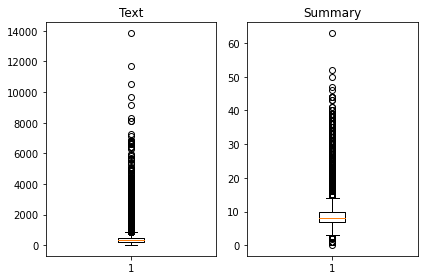

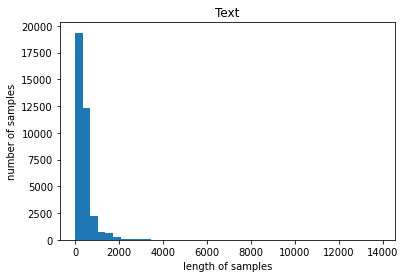

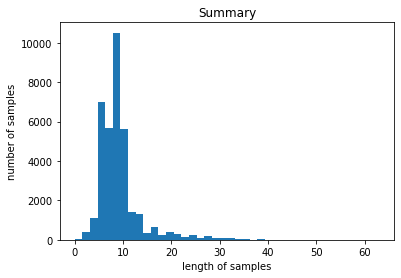

In [23]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s) for s in data['Text']]
summary_len = [len(s) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
text_max_len = 2500
summary_max_len = 35
print('=3')

=3


In [25]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [26]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 2500 이하인 샘플의 비율: 0.9930715935334873
전체 샘플 중 길이가 35 이하인 샘플의 비율: 0.9984974540193104


In [27]:
data = data[data['Text'].apply(lambda x: len(x) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35641


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 2499
텍스트의 평균 길이 : 407.7858365365731
요약의 최소 길이 : 0
요약의 최대 길이 : 35
요약의 평균 길이 : 9.03187340422547


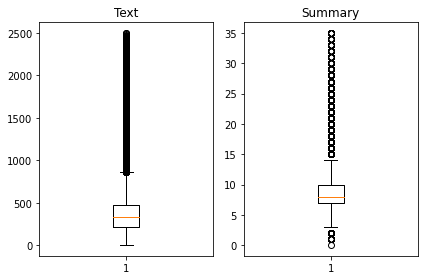

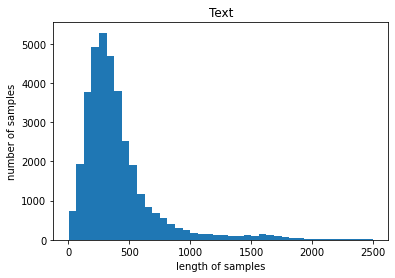

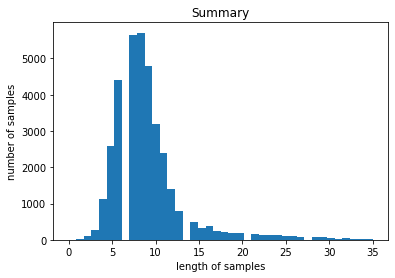

In [28]:
text_len = [len(s) for s in data['Text']]
summary_len = [len(s) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
data[data['Text'].apply(lambda x: len(x) <= 15)]

,본문,제목,Text,Summary
1617,【워싱턴/로이터=뉴시스】\n\n세계경제포럼(WEF)은 30일 국가별 경쟁력 순위를 ...,(워싱턴) 국가 경쟁력 순위표-세계 경쟁력 보고서,"[이, 기사, 는, 내용, 이, 없, 습니다]","[그림, 동의보감, 17, 폐, 심장, 기능, 높이, 는, 방법]"
2498,지난 28일자 동아 사회면(A31면) 머릿기사로 실린 <“독선과 편향된 시각 만연/...,동아 ‘NGO 자성 목소리’보도에 시민단체 “깎아내리기” 반발,"[2002, 년, 1, 월, 24, 일, 30, 일, 기준]","[섹션, 분석, 신문사, 별, 섹션, 현황]"
23377,"(서울=연합뉴스) 맹찬형기자 = 전두환(全斗煥) 전 대통령은 17일 ""남북정상회담이...","전두환씨 ""내부 결속 다져야""","[저작, 권, 자, 머니, 투데이, 경제, 신문]",[0]
25141,5월에 이어 5월에도 최대주주 보호예수가 해제되는 코스닥기업들이 산적해 있어 수급을...,[코스닥] 6월 대주주 해제물량 60종목은,"[이사, 대우, 부장, 차장]","[인사, 세종, 증권]"
25628,기업은행과 농협은 양사의 합병설에 대해 사실무근이라고 1일 밝혔다.\n\n양사는 기...,"[증시루머추적] 기업은행-농협 ""합병 사실무근""","[전국, 이, 흐리, 고, 강원도, 충북, 경상도, 전남, 및, 제주, 지방, 에서...","[날씨, 흐린, 하늘]"
25997,유니텍전자(대표 백승혁)는 올해부터 출시를 시작한 MP3플레이어 수출을 추진하고 있...,"[증시루머추적] 유니텍전자 ""MP3 수출 협의중""","[유상, 청약, 진흥기업, 일반, 공모, 주간, 사, 현대, 보통주, 추가, 상장,...","[거래소, 메모, 2, 일, 유상, 청약, 진흥기업, 등]"
26034,부국철강은 아직 유무상증자를 결정하지 못했다며 조금더 내부검토를 거쳐 오는 17일까...,"[증시루머추적] 부국철강 ""유무증 결정 못했다""","[매매, 거래, 정지, 캔디, 글로벌, 미디어, 주식, 병합, 을, 위한, 구주, ...","[거래소, 메모, 4, 일, 캔디, 글로벌, 미디어]"
26306,<김진환> 지난 주 나스닥은 최악의 폭락세를 기록한 악몽의 한 주였다. 마이크로소프...,[지난주 해외경제] 나스닥 끝없는 추락 3300대로,"[공모주, 청약, 대한, 뉴, 팜, 코스닥, 등록, 기업]","[증시, 메모, 추가, 상장]"
27264,"소프트웨어 유통에 주력하던 디지탈캠프가 카드리더기, 휴대용 스토리지 등을 개발, 하...",[디지탈캠프] 수출제조社 변신,"[tg, 벤처, 유상, 증자, 단수, 주, 18, 주, 를, 김태곤, 에, 배정, ...","[코스닥, 공시, tg, 벤처]"
27713,기존의 건축물이 갖고 있는 물리ㆍ경제ㆍ역사적 요소를 재활용할 수 있다는 측면에서 리...,[기고] 리모델링 시장 키우려면,"[edaily, 지영, 한, 기자, 지영, 한, 기자, yhji, edaily, c...","[정통부, 27, 일, 10, 시, 현재, 인터넷, 문제, 없, 다, 1, 보]"


In [30]:
data[data['Text'].apply(lambda x:type(x) is str)]

,본문,제목,Text,Summary
35939,처음 몇대의 PC를 무선으로 연결시키려고 고안된 단거리 무선통신 기술 와이파이(Wi...,[e월드]미국-무료 무선 네트워크 '기술혁명' 이뤄낼까,처음 몇대의 PC를 무선으로 연결시키려고 고안된 단거리 무선통신 기술 와이파이(Wi...,[e월드]미국-무료 무선 네트워크 '기술혁명' 이뤄낼까
35940,전세계 정보통신정책·경영 분야의 산·학·연 전문가들이 한자리에 모이는 ‘국제통신정책...,국제통신정책학회 학술대회,전세계 정보통신정책·경영 분야의 산·학·연 전문가들이 한자리에 모이는 ‘국제통신정책...,국제통신정책학회 학술대회
35941,김재섭 영창악기 회장이 17일 오전 4시 15분 숙환으로 별세했다. 향년 83세. ...,동정-김재섭 영창악기 회장 별세,김재섭 영창악기 회장이 17일 오전 4시 15분 숙환으로 별세했다. 향년 83세. ...,동정-김재섭 영창악기 회장 별세
35942,◆우리은행 ◇팀장·부장 △기업금융 이인영 △물류지원 고팔만 △재산관리 유중근 △국민...,인사,◆우리은행 ◇팀장·부장 △기업금융 이인영 △물류지원 고팔만 △재산관리 유중근 △국민...,인사
35943,영업이익보다는 순이익 증가율이 높은 기업의 주가가 더 많이 오른 것으로 나타났다. ...,"""영업익보다는 순익증가율 높은 기업 주가 더 올라""",영업이익보다는 순이익 증가율이 높은 기업의 주가가 더 많이 오른 것으로 나타났다. ...,"""영업익보다는 순익증가율 높은 기업 주가 더 올라"""
...,...,...,...,...
38046,"먼저, 이 글은 민주당 경선과정에서 이인제 후보가 노무현 후보에게 행하는 정치적 공...",'젊은 리더십'의 퇴행적인 정치 공세,"먼저, 이 글은 민주당 경선과정에서 이인제 후보가 노무현 후보에게 행하는 정치적 공...",'젊은 리더십'의 퇴행적인 정치 공세
38047,이인제 후보가 노무현 후보의 서민적 이미지를 깨기 위해서 예전에 주간조선에 91년 ...,요트인의 명예를 훼손하지 마십시오,이인제 후보가 노무현 후보의 서민적 이미지를 깨기 위해서 예전에 주간조선에 91년 ...,요트인의 명예를 훼손하지 마십시오
38048,이론테크놀로지(공동대표 전병엽/최경주)가 홍콩의 Michael & Christine...,"이론테크, 중국형 CDMA 단말기 본격 수출",이론테크놀로지(공동대표 전병엽/최경주)가 홍콩의 Michael & Christine...,"이론테크, 중국형 CDMA 단말기 본격 수출"
38049,"지난해 전남도내 신선농산물의 수출이 파프리카, 멜론 등을 중심으로 크게 늘었다. 그...",고품질 농산물도 헐값…소비촉진대책 절실,"지난해 전남도내 신선농산물의 수출이 파프리카, 멜론 등을 중심으로 크게 늘었다. 그...",고품질 농산물도 헐값…소비촉진대책 절실


In [31]:
data = data[data['Text'].apply(lambda x: len(x) >= 15)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35617


In [32]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : ['<sos>'] + x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ['<eos>'])
data.head()

TypeError: can only concatenate list (not "str") to list

In [29]:
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [30]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[30250 15764 24407 ... 28862 11355 25644]


In [31]:
what = np.arange(50)
what

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [32]:
encoder_input[[3,2,1,3]]

array([' 다음은 미 시애틀에서 발행되는 시애틀 포스트 인텔리젠서의 18일자 사설 석유와 전쟁과의 연관을 아는가 를 번역한 것이다 이 사설은 중동지역의 평화 나아가 지구생태계의 보전을 위해서는 미국경제의 과도한 석유 의존을 줄여야 한다고 강조하고 있다 미 테러전쟁은 오사마 빈 라덴 등 테러리스트의 제거를 목표로 하고 있지만 그 뿌리에는 중동지역의 석유자원에 대한 미국의 집요한 집착이 있다 석유자원의 확보를 위해 미국은 사우디 아라비아 등 전제정권을 비호하고 있으며 이 때문에 아랍인들의 반미감정은 갈수록 높아가고 있다 지구상의 석유는 이르면 40년내에 바닥이 난다고 한다 따라서 이번 전쟁은 미국과 아랍권의 정치 군사적 갈등일 뿐만 아니라 유한한 자원을 둘러싼 자원쟁탈전의 측면도 보여 주고 있는 것이다 이번 전쟁의 장기적 생태적 의미를 짚어 보는 의미에서 이 글을 게재한다 편집자 미국의 테러전쟁과 미 국민의 내연기관에의 의존은 직접적이고도 불가피한 연관관계가 있다 석유가 필요없었다면 미국은 결코 중동문제에 그토록 과도하고 또 위험스럼게 개입을 하지 않았을 것이다 그럼에도 불구하고 미 의회는 이처럼 값비싼 희생을 요구하는 석유와 전쟁과의 연관에 애써 눈을 감고 있다 지금이야말로 아프가니스탄에 무차별 융단폭격이 가해지고 우리의 자식들이 외국의 전쟁터에서 싸늘한 시체가 돌아오는 지금이야말로 석유에의 과도한 의존을 줄일 수 있는 보다 합리적이고 장기적인 에너지대책의 기초를 세울 수 있는 절호의 기회다 그러나 우유부단한 연방 의원들은 다시 한번 이 도전으로부터 꽁무니를 빼고 있다 미 의회는 이번 회기에도 광범위한 에너지정책의 입안을 포기했다 이는 중대한 직무유기가 아닐 수 없다 너무도 오랫동안 미국은 탐욕스럽게 기름을 잡아먹는 내연기관에 석유를 채워주는 것이 에너지 안보의 전부라고 생각해 왔다 이는 정치적으로 군사적으로 그리고 생태적으로 절대 오래 지속될 수 없다 석유 확보를 위해 미국은 너무도 쉽게 옳지 않은 야합을 해 왔다 이같은 야합은 특히 중동지역에서 두드러진

In [33]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [34]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 7035


In [35]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 28140
훈련 레이블의 개수 : 28140
테스트 데이터의 개수 : 7035
테스트 레이블의 개수 : 7035


In [36]:
hi = Tokenizer()
hi.fit_on_sequences([['안녕', '나는','해창이야'],['이렇게','하는','건가?']])

In [99]:
tokenizer = Tokenizer() # 토크나이저 정의
tokenizer.fit_on_texts(hi := encoder_input_train+decoder_input_train +['eostoken eostoken eostoken eostoken eostoken eostoken eostoken eostoken eostoken eostoken']) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [100]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 782905
등장 빈도가 2번 이하인 희귀 단어의 수: 608152
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 174753
단어 집합에서 희귀 단어의 비율: 77.67890101608752
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.13130655030817


In [101]:
src_vocab = 180000
tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 180,000으로 제한
tokenizer.fit_on_texts(hi) # 단어 집합 재생성
print('=3')

=3


In [102]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train_tenser = tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test_tenser = tokenizer.texts_to_sequences(encoder_input_test)
decoder_input_train_tenser = tokenizer.texts_to_sequences(decoder_input_train)
decoder_input_test_tenser = tokenizer.texts_to_sequences(decoder_input_test)


# 잘 진행되었는지 샘플 출력
print(encoder_input_train_tenser[:3])

[[1765, 174754, 39, 2896, 417, 30, 5712, 11363, 104, 37695, 5467, 1452, 318, 130000, 102, 1330, 35471, 14911, 58, 174755, 845, 41, 151, 277, 6, 345, 143, 2435, 554, 180, 87645, 164, 123, 234, 75948, 554, 87646, 80, 21282, 3, 130001, 3058, 174756, 5, 16442, 602, 33547, 14911, 40175, 87647, 1573, 11154, 87648, 46295, 104446, 848, 219, 1295, 104447, 180, 67036, 11, 22, 48, 41, 174757, 5713, 3000, 174758, 463, 34, 61, 49, 14911, 21991, 25484, 174759, 60143, 136, 37696, 3474, 5467, 2803, 399, 20586, 16443, 4, 102, 13035, 13916, 101, 30281, 102, 7808, 2037, 8, 404, 15266, 1573, 31803, 87648, 46295, 104446, 848, 219, 49, 1295, 104447, 180, 67036, 11, 22, 48, 41, 174757, 843, 14911, 30, 104448, 11363, 6022, 104, 37695, 1406, 174760, 67037, 87649, 23601, 873, 2435, 46296, 1636, 8046, 1821, 7161, 67038, 1530, 46297, 60144, 101, 27718, 35, 226, 8887, 75949, 50060, 87648, 58, 40176, 2358, 35472, 8047, 4028, 68, 49, 1295, 174761, 180, 67036, 11, 22, 123, 21283, 174762, 4414, 13036, 87648, 219, 75, 

In [103]:
decoder_target_train_tenser = tokenizer.texts_to_sequences(decoder_target_train)
decoder_target_test_tenser = tokenizer.texts_to_sequences(decoder_target_test)


In [104]:
# tar_tokenizer = Tokenizer()
# tar_tokenizer.fit_on_texts(decoder_input_train)
# print('=3')

In [105]:
# threshold = 3
# total_cnt = len(tar_tokenizer.word_index) # 단어의 수
# rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
# total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
# rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
# for key, value in tar_tokenizer.word_counts.items():
#     total_freq = total_freq + value

#     # 단어의 등장 빈도수가 threshold보다 작으면
#     if(value < threshold):
#         rare_cnt = rare_cnt + 1
#         rare_freq = rare_freq + value

# print('단어 집합(vocabulary)의 크기 :', total_cnt)
# print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
# print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
# print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
# print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [106]:
# set(tar_tokenizer.index_word.values()) - set(src_tokenizer.index_word.values())

In [107]:
# tar_vocab = 10000
# tar_tokenizer = Tokenizer(num_words=tar_vocab) 
# tar_tokenizer.fit_on_texts(decoder_input_train)
# tar_tokenizer.fit_on_texts(decoder_target_train)

# # 텍스트 시퀀스를 정수 시퀀스로 변환
# decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
# decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
# decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
# decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# # 잘 변환되었는지 확인
# print('input')
# print('input ',decoder_input_train[:5])
# print('target')
# print('decoder ',decoder_target_train[:5])

In [108]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 28140
훈련 레이블의 개수 : 28140
테스트 데이터의 개수 : 7035
테스트 레이블의 개수 : 7035


In [109]:
encoder_input_train = pad_sequences(encoder_input_train_tenser, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test_tenser, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train_tenser, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train_tenser, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test_tenser, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test_tenser, maxlen=summary_max_len, padding='post')
print('=3')

=3


In [110]:
import tensorflow as tf
# tf.debugging.set_log_device_placement(False)

In [111]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [112]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(src_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [113]:
# 디코더의 출력층
decoder_softmax_layer = Dense(src_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 800)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 800, 128)     23040000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 800, 256), ( 394240      embedding_6[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [114]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(src_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 800)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 800, 128)     23040000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 800, 256), ( 394240      embedding_6[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [117]:
print('hi')

hi


In [115]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=32, callbacks=[es], epochs=50)

Epoch 1/50
880/880 [==============================] - 294s 328ms/step - loss: 3.1701 - val_loss: 2.7976
Epoch 2/50
880/880 [==============================] - 288s 327ms/step - loss: 2.9408 - val_loss: 2.7405
Epoch 3/50
880/880 [==============================] - 288s 327ms/step - loss: 2.8519 - val_loss: 2.6918
Epoch 4/50
880/880 [==============================] - 288s 328ms/step - loss: 2.7943 - val_loss: 2.6425
Epoch 5/50
880/880 [==============================] - 288s 328ms/step - loss: 2.7437 - val_loss: 2.6287
Epoch 6/50
880/880 [==============================] - ETA: 0s - loss: 2.6962

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f9c52fd3280>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 545, in __del__
    gen_dataset_ops.delete_iterator(
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1263, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 


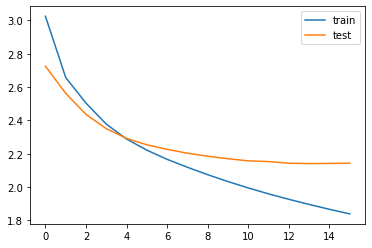

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')

=3


In [ ]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : bought iams kitten formula cheapest pet store kitten likes give diarrhea anything smell room much qualifies good kitten food book 
실제 요약 : kitten likes it 
예측 요약 :  not for my dog


원문 : got paid complaints buying food storage light easily stored perfect 
실제 요약 : as good as advertised 
예측 요약 :  great product


원문 : like using various types sauce foods tacos taco salads hamburgers etc first time used chipotle sauce loved smoking flavor perfect tacos fixed daughter tried liked well thick enough thick something ate hands flavor good sauce hot like taste basically good middle road sauce far heat factor providing great taste anyone wants something little different 
실제 요약 : my new favorite sauce 
예측 요약 :  great flavor


원문 : recently received one bars voxbox review purposes really quite enjoyed banana person like almonds figured would test glad would picked box grocery store since tried one purchased three boxes prefer microwave seconds since bar tastes better heated also bit crunchy ov

In [ ]:
import requests
from summa.summarizer import summarize

In [ ]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [ ]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [ ]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [ ]:
from importlib.metadata import version
import nltk
import tensorflow
import summa

print(nltk.__version__)
print(tensorflow.__version__)
print(version('summa'))

3.6.5
2.6.0
1.2.0


In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [ ]:
data.sample(10)

,headlines,text
26407,Pumps in Thai cave failed just after last boy ...,The water pumps draining the flooded cave in T...
47358,Shoaib Akhtar named brand ambassador of Pak Cr...,Former Pakistani fast bowler Shoaib Akhtar has...
35085,2 wickets in 2 balls happen twice in the same ...,"During the MI-RCB IPL match on Tuesday, two wi..."
14139,WhatsApp sets up system to store payments data...,Facebook-owned messaging service WhatsApp has ...
22052,Bajaj Electricals MD Anant Bajaj passes away a...,The Managing Director (MD) of Bajaj Electrical...
42296,Russia supplying arms to the Taliban: US,"The Commander of US forces in Afghanistan, Gen..."
62012,Bitcoin not to be used for payments for now: R...,Executive Director of Reserve Bank of India S ...
27758,Instagram may let users ask questions in Stories,Facebook-owned photo-sharing app Instagram is ...
45404,Who are the nominees for Best Actor at Oscars ...,Denzel Washington is among the nominees for th...
18323,BJP govt is India's most non-performing asset:...,"Ahead of the release of his new book, senior C..."
